In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("fraudTest.csv")
test_data = pd.read_csv("fraudTrain.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

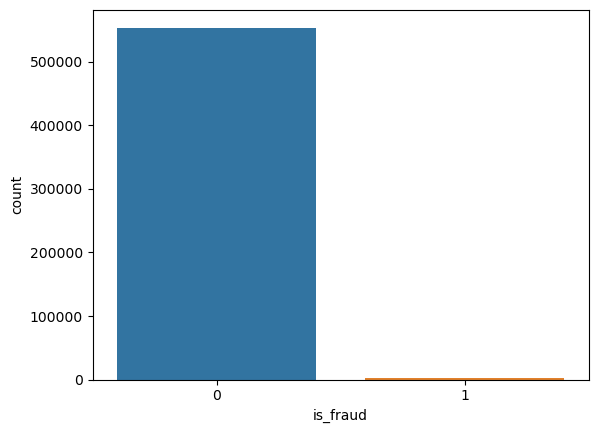

In [13]:
plt.figure()
sns.countplot(x='is_fraud', data=train_data)
plt.show()
train_data_fraud_count = train_data['is_fraud'].count()

In [14]:
def data_prep(data):
    data['gender'] = data['gender'].apply(lambda x: 1 if x == 'M' else 0)
    data['gender'] = data['gender'].astype(int)

    data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
    data['trans_date'] = data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    data['trans_date'] = pd.to_datetime(data['trans_date'])
    data['dob'] = pd.to_datetime(data['dob'])

    data['age'] = (data['trans_date'] - data['dob']).dt.days // 365

    data = pd.get_dummies(data, columns=['category'])
    columns_to_drop = ['city', 'trans_date_trans_time', 'state', 'job',
                       'merch_lat', 'merch_long', 'lat', 'long', 'dob', 'trans_date',
                       'merchant', 'first', 'last', 'street', 'zip', 'unix_time',
                       'Unnamed: 0', 'trans_num', 'cc_num']
    data = data.drop(columns=columns_to_drop)

    return data

In [16]:
train_data_prep = data_prep(train_data.copy())
test_data_prep = data_prep(test_data.copy())

In [17]:
x_train = train_data_prep.drop('is_fraud', axis=1)
x_test = test_data_prep.drop('is_fraud', axis=1)

y_train = train_data_prep['is_fraud']
y_test = test_data_prep['is_fraud']

In [18]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled, y_train)
y_logistic_pred = logistic_model.predict(x_test_scaled)
print(classification_report(y_test, y_logistic_pred))
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
print('Accuracy =', logistic_accuracy)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675

Accuracy = 0.9939622495999383


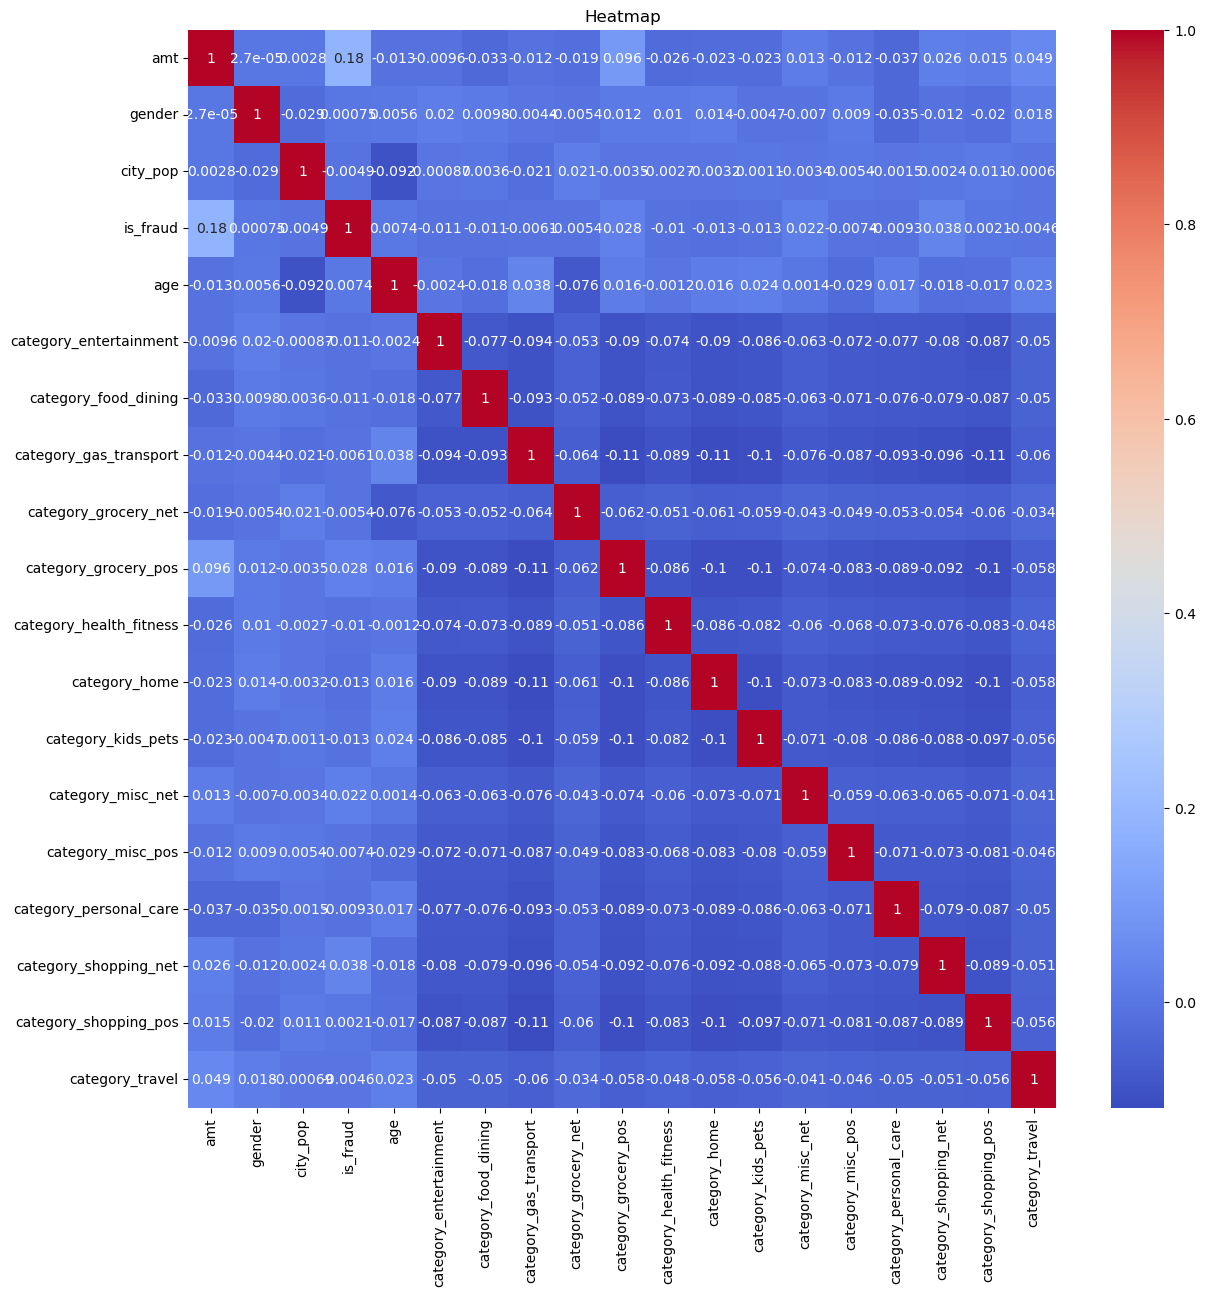

In [23]:
plt.figure(figsize=(14, 14))
correlation_matrix = train_data_prep.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Heatmap')
plt.show()

In [24]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train_scaled, y_train)
y_tree_pred = tree_model.predict(x_test_scaled)
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print('Accuracy:', tree_accuracy)
print(classification_report(y_test, y_tree_pred))

Accuracy: 0.9960090230782579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.67      0.61      0.64      7506

    accuracy                           1.00   1296675
   macro avg       0.84      0.80      0.82   1296675
weighted avg       1.00      1.00      1.00   1296675

